In [56]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squidpy as sq

In [57]:
slice1 = anndata.read_h5ad('/SABench/data/Flysta3D_processed/E14_16/Stereoseq_3_processed.h5ad')
slice2 = anndata.read_h5ad('/SABench/data/Flysta3D_processed/E14_16/Stereoseq_4_processed.h5ad')

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


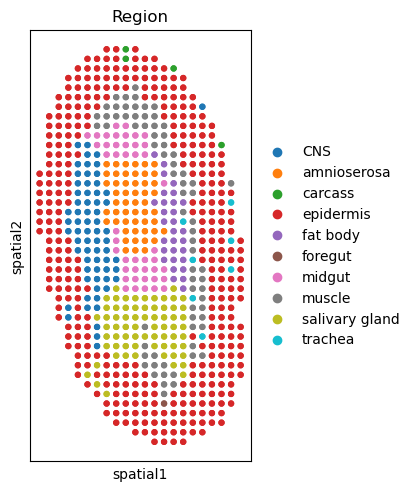

In [58]:
sq.pl.spatial_scatter(slice1,library_id="spatial",shape=None,color="Region",wspace=1,size=50)

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


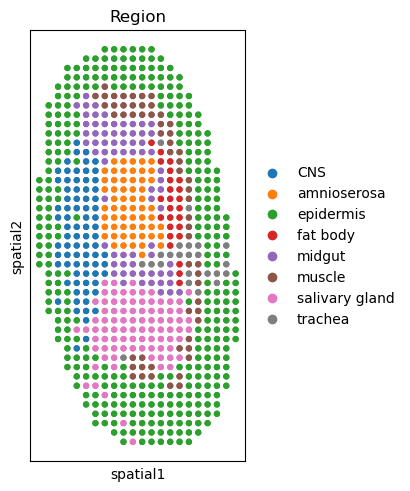

In [59]:
sq.pl.spatial_scatter(slice2,library_id="spatial",shape=None,color="Region",wspace=1,size=50)

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModi

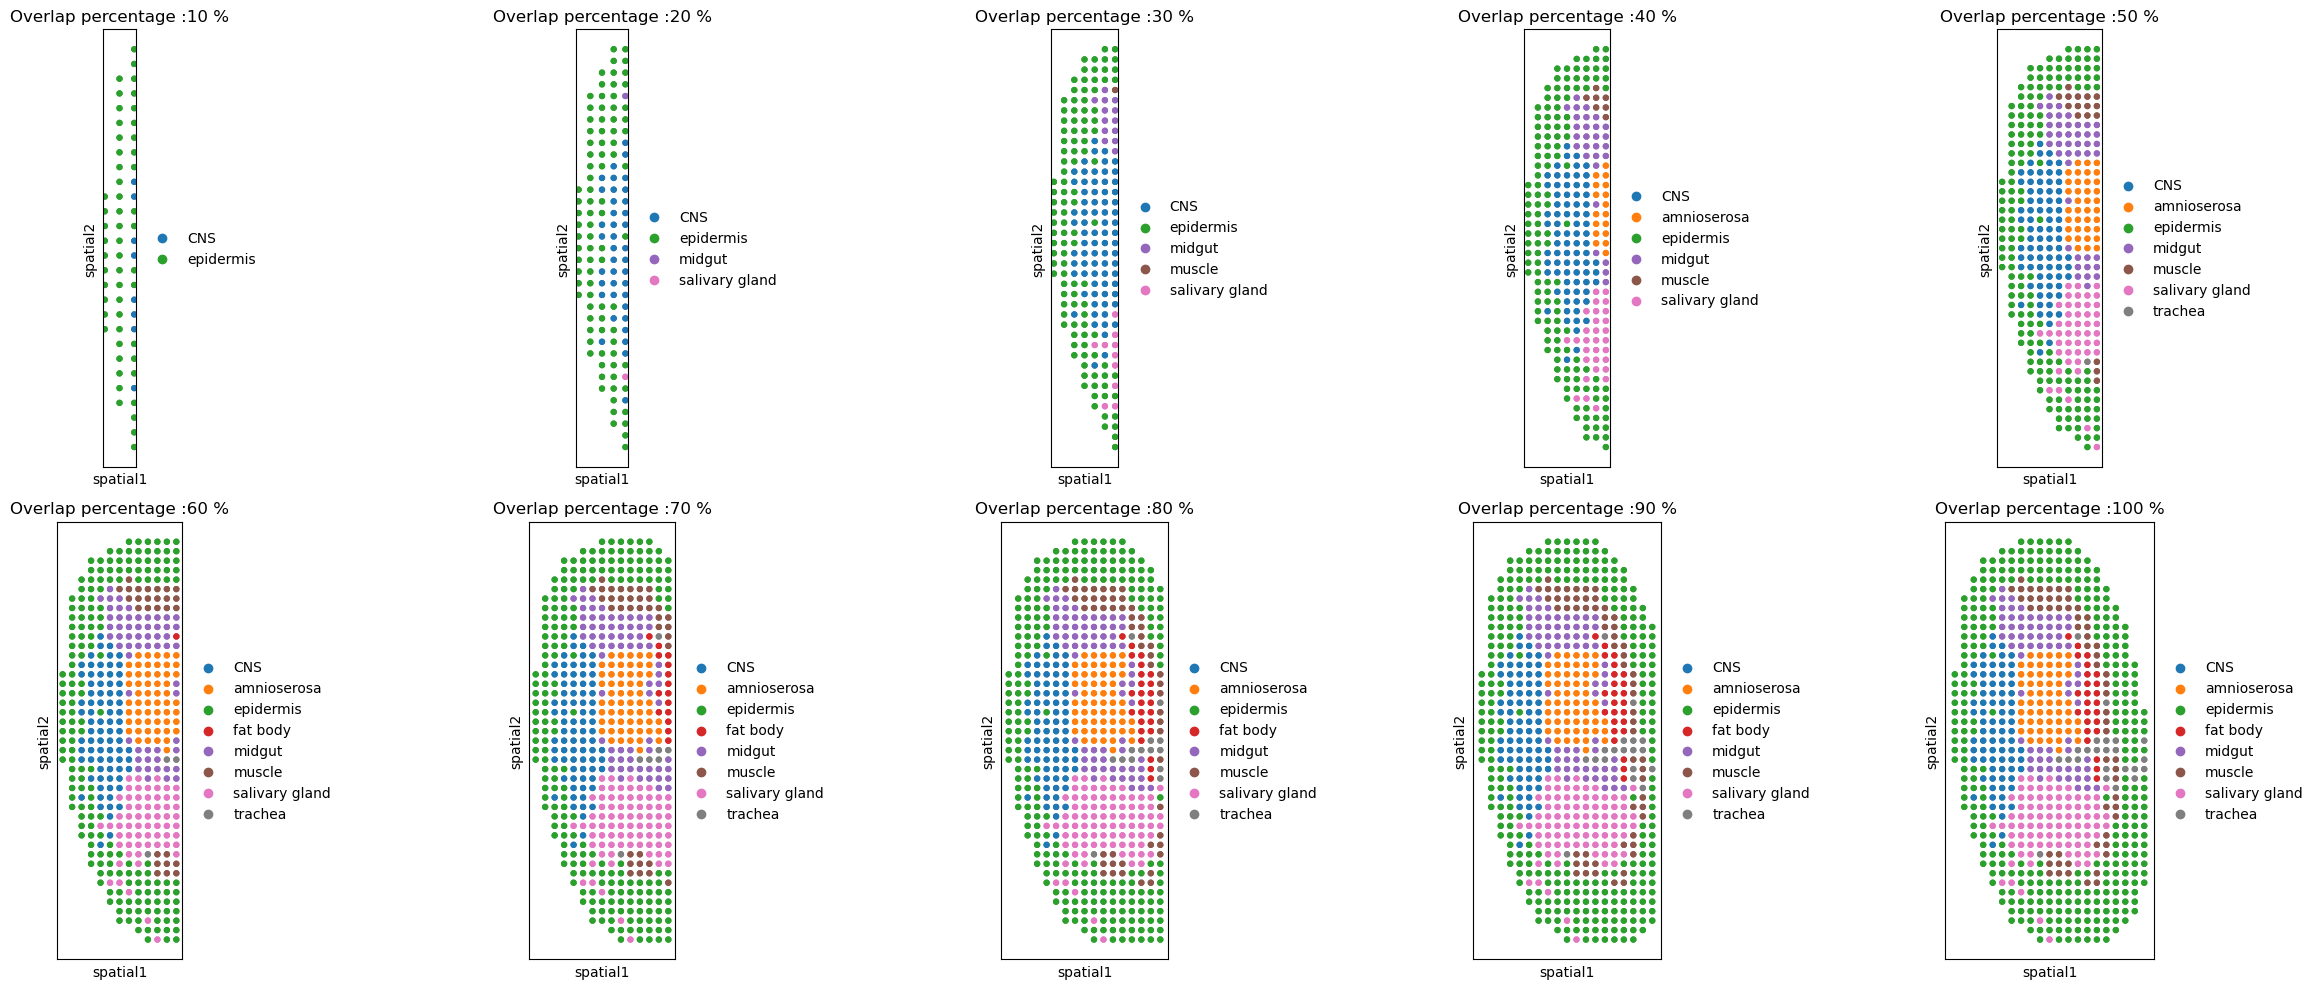

View of AnnData object with n_obs × n_vars = 700 × 13668
    obs: 'slice_ID', 'raw_x', 'raw_y', 'new_x', 'new_y', 'new_z', 'annotation', 'Region', 'total_counts'
    uns: 'Region_colors'
    obsm: 'spatial', 'spatial_GT'

In [60]:
def crop_adata(slice,overlap_percentage,save_path):
 
    ad = slice.copy()
    
    x_coords = ad.obsm['spatial'][:, 0]

    x_min = np.min(x_coords)
    x_max = np.max(x_coords)
    
    x_threshold = x_min + (x_max - x_min) * (overlap_percentage/100)
        
    # 
    indices = np.where(x_coords < x_threshold)[0]
    cropped_ad = ad[indices]
    cropped_ad.write_h5ad(save_path)
    return cropped_ad

percentage = [i for i in range(10, 101, 10)]
fig, axs = plt.subplots(2, 5, figsize=(25, 10)) 
axs=axs.flatten()
for index,ratio in enumerate(percentage):
    new_slice = crop_adata(slice2, ratio, f'/SABench/Data/Flysta_cropped/Flysta_2_cropped_{ratio}%.h5ad')
   
    # 
    sq.pl.spatial_scatter(new_slice,library_id="spatial",shape=None,color="Region",wspace=1,ax=axs[index],size=50)

    #axs[index].invert_yaxis()

    axs[index].set_title(f'Overlap percentage :{ratio} %')

plt.tight_layout()
plt.show()

crop_adata(slice1, 100, f'/SABench/Data/Flysta_cropped/Flysta_1_cropped_100%.h5ad')